Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
[*********************100%***********************]  3 of 3 completed
Max Sharpe: 0.0036329758018816293
Loc SA: 24


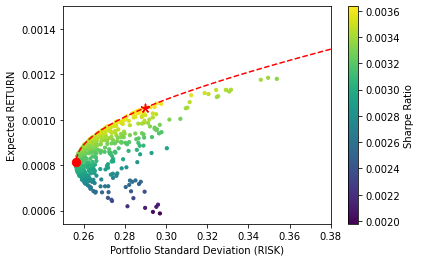

In [ ]:
# Program_9c.py: Modern Portfolio Theory.
!pip install yfinance
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
df=yf.download(['AAPL','CAT','GOOG'],start="2000-12-01",\
               end="2020-12-01")
df=np.log(1+df['Adj Close'].pct_change()) 
# Normalized Portfolio Returnsdf.drop('Date', axis=1, inplace=True)#
df.to_csv('Portfolio_Data.csv')
def PR(weights): # Portfolio Return
  return np.dot(df.mean(),weights)
def PSTD(weights): # Portfolio STD
  return (np.dot(np.dot(df.cov(),weights),weights))**(1/2)*\
  np.sqrt(250) 
  # Annualize STD, 250 trading days.
def RW(df): # Random Weights
  rand=np.random.random(len(df.columns))
  rand /= rand.sum()
  return rand
returns , stds , w , SharpeArr = [] ,[] ,[], []
for i in range(500):   # Why 500?
  weights=RW(df)
  returns.append(PR(weights))
  stds.append(PSTD(weights))
  w.append(weights)
  SharpeArr.append(returns[i]/stds[i])
print('Max Sharpe: {}'.format(max(SharpeArr)))
print('Loc SA: {}'.format(np.argmax(SharpeArr)))
argmaxSA=np.argmax(SharpeArr)
maxsa=returns[np.argmax(SharpeArr)]
maxstds=stds[np.argmax(SharpeArr)]

plt.scatter(stds,returns,c=SharpeArr,cmap='viridis',s=10)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(stds[argmaxSA],returns[argmaxSA],c='r',s=70,marker=(5, 2))
plt.scatter(min(stds),returns[stds.index(min(stds))],c='r',s=70)
plt.xlabel('Portfolio Standard Deviation (RISK)')
plt.ylabel('Expected RETURN')

a , h =min(stds) , returns[stds.index(min(stds))]
xx , yy = stds[argmaxSA] , returns[argmaxSA]

b=np.sqrt((a**2*(yy-h)**2)/(xx**2-a**2))

xlist = np.linspace(0.25,0.38, 1000)
y1list = np.linspace(h, 0.0015, 120)
x, y1 = np.meshgrid(xlist, y1list)
y2list = np.linspace(0.0004, h, 120)
x, y2 = np.meshgrid(xlist, y2list)
Z = x**2/a**2-(y1-h)**2/b**2
plt.contour(x,y1,Z,[1],colors='red',linestyles='dashed')
#Z = x**2/a**2-(y2-h)**2/b**2
#plt.contour(x,y2,Z,[1],colors='blue')
plt.savefig("Fig9.3.eps" , dpi = 400)
plt.show()